In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy.polynomial.polynomial as poly # used for polynomial fitting
from scipy.optimize import minimize # for optimization
from numpy.polynomial import Polynomial

In [2]:
# Data
T = [351.4, 351.5, 351.7, 351.8, 352.3, 352.6, 353.2, 353.4, 354.1, 354.7, 355.2, 356.0, 357.5, 358.4, 358.7, 360.4, 361.4, 362.6, 363.9, 365.8, 367.3, 368.8, 370.7, 372.3]
y_A = [0.961, 0.834, 0.764, 0.745, 0.682, 0.659, 0.632, 0.610, 0.594, 0.571, 0.543, 0.524, 0.480, 0.448, 0.436, 0.399, 0.358, 0.326, 0.289, 0.234, 0.184, 0.129, 0.056, 0.014]
x_A = [0.963, 0.815, 0.722, 0.690, 0.588, 0.520, 0.460, 0.414, 0.356, 0.283, 0.228, 0.198, 0.136, 0.107, 0.099, 0.077, 0.062, 0.054, 0.044, 0.032, 0.023, 0.015, 0.006, 0.001]

In [3]:
def wt_to_mol_frac(wt_ethanol, mr_ethanol=46.07, mr_water=18.02):
    """
    Convert weight percent (wt%) of ethanol in water to mole percent (mol%).

    Args:
    wt_ethanol: Weight percent of ethanol in the mixture.
    mr_ethanol: Molar mass of ethanol (default: 46.07 g/mol).
    mr_water: Molar mass of water (default: 18.02 g/mol).

    Returns:
    mol_percent_ethanol: Mole percent of ethanol in the mixture.
    """
    # Calculate the mass of ethanol and water
    mass_ethanol = wt_ethanol
    mass_water = 1 - wt_ethanol
    
    # Calculate moles of ethanol and water
    moles_ethanol = mass_ethanol / mr_ethanol
    moles_water = mass_water / mr_water
    
    # Calculate total moles
    total_moles = moles_ethanol + moles_water
    
    # Calculate mole frac of ethanol
    mol_percent_ethanol = (moles_ethanol / total_moles)
    
    return mol_percent_ethanol


def mol_to_wt_frac(mol_ethanol, mr_ethanol=46.07, mr_water=18.02):
    """
    Convert mole percent (mol%) of ethanol in water to weight percent (wt%).

    Args:
    mol_ethanol: Mole percent of ethanol in the mixture.
    mr_ethanol: Molar mass of ethanol (default: 46.07 g/mol).
    mr_water: Molar mass of water (default: 18.02 g/mol).

    Returns:
    wt_percent_ethanol: Weight percent of ethanol in the mixture.
    """
    # Calculate moles of ethanol and water in a 100-mole basis
    moles_ethanol = mol_ethanol 
    moles_water = (1 - mol_ethanol) 
    
    # Convert moles to masses
    mass_ethanol = moles_ethanol * mr_ethanol
    mass_water = moles_water * mr_water
    
    # Calculate total mass
    total_mass = mass_ethanol + mass_water
    
    # Calculate weight percent of ethanol
    wt_percent_ethanol = (mass_ethanol / total_mass)
    
    return wt_percent_ethanol

The slope of the rectifying section operating line is: 0.6857
The Rmin is: 2.1816


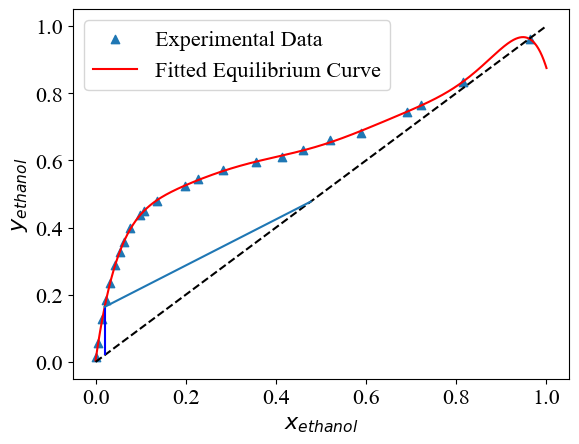

In [4]:
# Minimum Reflux Ratio for 0.05 wt% input and 0.7 wt% output
zF = wt_to_mol_frac(0.05)
xD = wt_to_mol_frac(0.7)
yD = xD

a = np.linspace(0, 1, 1000)
n = 8
eq_line_x = poly.Polynomial.fit(x_A, y_A, n)
y_eq = np.polynomial.polynomial.Polynomial.fit(x_A, y_A, 8)
derivative = eq_line_x.deriv(m=1)

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.scatter(x_A, y_A, marker='^', label="Experimental Data")
plt.plot(a, eq_line_x(a), linestyle="-", color='red', label="Fitted Equilibrium Curve")
plt.plot(a, a, '--', color='black')
plt.xlabel(r'$x_{ethanol}$')
plt.ylabel('$y_{ethanol}$')
#plt.title('Ethanol (x-y): Minimum Reflux Ratio')
plt.legend()

# Set up optimization problem
def getLineSlope(x2, y2, x1, y1):
   ''' Return slope between two given points (x1, y1) and (x2, y2). '''
   return (y2-y1)/(x2-x1)

def evaluateLine(x, slope, x0, y0):
   ''' Evaluate and return line evaluated at x given the slope and point on the line. '''
   return y0+slope*(x-x0)

def loss_function(x):
   ''' Minimize the absolute difference between the derivative and the slope of a line between (x*, y*) and (x_D, y_D) '''
   slope_fitted = derivative(x)
   slope_line = getLineSlope(x, eq_line_x(x), xD, yD)
   return np.abs(slope_fitted-slope_line)

x2 = zF
y1 = x2
y_intercept = y_eq(zF)
plt.vlines(x = zF, ymin = zF, ymax = y_intercept, colors = 'b')

#Rectifying section operating line starts at the x_D point on diagonal
recx = np.linspace(zF,xD,200)
y_opline = ((xD-y_intercept)/(xD-zF))*(recx - xD)+xD
y_oprec = np.poly1d(np.polyfit(recx,y_opline,1))
plt.plot(recx, y_oprec(recx))

# Print the slope of the operating line
slope = y_oprec.coefficients[0]  # Slope is the first coefficient
Rmin_5zF = slope / (1 - slope)
print(f"The slope of the rectifying section operating line is: {slope:.4f}")
print(f"The Rmin is: {Rmin_5zF:.4f}")

Line Solution is y = 7.262067661758218x + 9.409873752974085e-18
Stage 1 0.1311285047219872 0.4771704180064308
Stage 2 0.029624213148653527 0.22677393178133193
x_0_LK / x_0_LK is 0.03052859886866871
Stage 3 0.01876363402946972 0.15332526278776215
x_0_LK / x_0_LK is 0.01912244050485309
Stage 4 0.016655795522864638 0.1362627799024781
x_0_LK / x_0_LK is 0.01693790988651921
Stage 5 0.014685879041987074 0.12095551404745261
x_0_LK / x_0_LK is 0.014904768671850671
Stage 6 0.012742346694971202 0.1066498472753071
x_0_LK / x_0_LK is 0.012906809739396626
Stage 7 0.010741738940794932 0.09253578386846209
x_0_LK / x_0_LK is 0.010858376789589489
Stage 8 0.008657978789635666 0.07800723499299586
x_0_LK / x_0_LK is 0.008733594061779844
Stage 9 0.006569311805825454 0.06287482778440175
x_0_LK / x_0_LK is 0.006612753042456269
Stage 10 0.004676881881258526 0.04770678682509152
x_0_LK / x_0_LK is 0.0046988578845614404
Stage 11 0.003177521993376761 0.033963832667750486
x_0_LK / x_0_LK is 0.003187650823977154
St

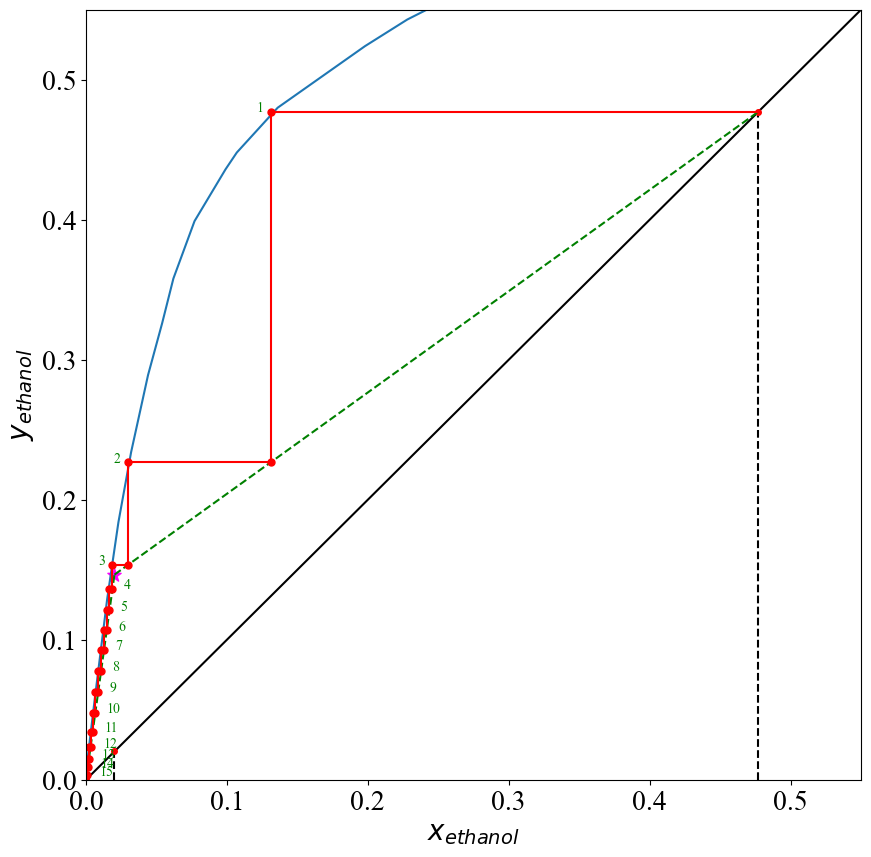

In [5]:
def rectifying_line(x, R, xD):
    return (R/(R+1))*x + xD/(R+1)

# Theoretical number of stages for 5wt% feed
R_5zF = Rmin_5zF * 1.2
zF = wt_to_mol_frac(0.05)
xD = wt_to_mol_frac(0.7)
xB = 0

#Q line is a vertical line
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.figure(figsize=(10, 10)) 
plt.xlim(0, 0.55)
plt.ylim(0, 0.55)
y_intercept = rectifying_line(zF,R_5zF,xD)
plt.plot(x_A[:], y_A[:])
plt.plot([0,1], [0,1], 'k-')

#xD
plt.plot([xD, xD], [0, xD], "k--")
plt.plot(xD, xD, "ro", ms = 4)
#plt.text(xD-0.05, 0.02, "xD".format(float(xD)))

#zF
plt.plot([zF, zF], [0, zF], "k--")
plt.plot(zF, zF, "ro", ms = 4)
#plt.text(zF-0.05, 0.02, "zF".format(float(zF)))

#xB
plt.plot([xB, xB], [0, xB], "k--")
plt.plot(xB, xB, "ro", ms = 4)
#plt.text(xB-0.05, 0.02, "xB".format(float(xB)))

#Draw the rectifying op line
plt.plot([zF, xD], [y_intercept, xD], "g--")

#Draw the stripping op line
plt.plot([xB, zF], [xB, y_intercept], "g--")

#Mark the intercept dot
plt.plot(zF, y_intercept, color = "gold", ms = 4)
plt.scatter(zF, y_intercept, s = 100, c = "fuchsia", marker = "*")

plt.xlabel('$x_{ethanol}$')
plt.ylabel('$y_{ethanol}$')
#plt.title('y-x for ethanol-water')
#plt.grid(True)

## Define the stripping_line
from numpy import ones,vstack
from numpy.linalg import lstsq

points = [(xB, xB),(zF, y_intercept)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords, rcond = None)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

# linear line with slope m and constant c found with least square regression
def stripping_line(x):
    return m*x+c

### Draw the rectangular steps
x = xD
y = xD
x_y = np.poly1d(np.polyfit(y_A,x_A,10))
x = x_y(y) # Horizontal line to the y-x line
plt.plot([xD,x], [xD,y], 'r')
plt.plot(x,y, "ro", ms = 5)
x_0 = x
y_0 = y

N = 1
plt.annotate(N, (x-0.01,y),color='green', size='10')
print('Stage 1', x_0, y_0)  
while x > xB:   
    if x >= zF:
        y = rectifying_line(x, R_5zF, xD)
        plt.vlines(x=x_0, ymin = y, ymax = y_0, colors = 'r')
        plt.plot(x,y, "ro", ms = 5)
        y_0 = y
         
        
        x = x_y(y)
        plt.hlines(y = y_0, xmin = x_0, xmax = x, colors =  'r')
        N+=1
        plt.annotate(N, (x-0.01,y),color='green', size='10')
        plt.plot(x,y, "ro", ms = 5)
        x_0 = x
        print('Stage', N, x_0, y_0)  
        print("x_0_LK / x_0_LK is", x_0/(1-x_0))
        
        
    else: # x >= xB and x< zF
        y = stripping_line(x)
        
        plt.vlines(x=x_0, ymin = y, ymax = y_0, colors = 'r')
        plt.plot(x,y, "ro", ms = 5)
        y_0 = y
         
        
        x = x_y(y)
        plt.hlines(y = y_0, xmin = x_0, xmax = x, colors = 'r')
        N+=1
        plt.annotate(N, (x+0.01,y),color='green', size='10')
        plt.plot(x,y, "ro", ms = 5)
        x_0 = x
        print('Stage', N, x_0, y_0)
        print("x_0_LK / x_0_LK is", x_0/(1-x_0))  


print("Feed x_0_LK / x_0_LK is", zF/(1-zF))        
plt.plot(x,x, "ro", ms = 5)
plt.plot([x,x], [x,y], 'r')
plt.show()